## 📚 Exercise: Latent Semantic Indexing
In this exercise we would learn about Latent Semantic Indexing (LSI) based retrieval models.

### Goal:
- Implement a search engine using LSI
- Visualize the LSI concepts
- Compare the retrieval results with scikit vector space retrieval method (as an oracle)

### What you are learning in this exercise:
1. Learn more about LSI approach
2. How retrieval results can be different in LSI and vector space retrieval models


## Part1: Implement Latent Semantic Indexing (LSI)
### 1.1 Read the corpus data

In [90]:
#Required libraries

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import math
from nltk.stem import PorterStemmer, WordNetLemmatizer
import os
import string
import numpy as np
from collections import Counter
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.corpus import stopwords
from collections import Counter
from operator import itemgetter
from pprint import pprint
import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english')).union(set(stopwords.words('french')))

[nltk_data] Downloading package punkt to /Users/aibin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/aibin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
def read_corpus():
    '''Reads corpus from files.'''
    
    documents = []
    orig_docs = []
    DIR = './'
    tknzr = TweetTokenizer()
    with open("epfldocs.txt", encoding = "utf-8") as f:
        content = f.readlines()
    for text in content:
        orig_docs.append(text)
        # split into words
        tokens = tknzr.tokenize(text)
        # convert to lower case
        tokens = [w.lower() for w in tokens]
        # remove punctuation from each word
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]
        # filter out stop words
        words = [w for w in words if not w in stop_words]

        documents.append(' '.join(words))
    return documents, orig_docs

In [92]:
documents, orig_docs = read_corpus()

In [93]:
assert(len(documents) == 1075)

In [94]:
documents

['congrats ethen place epflen place',
 'thats standing ovation epflen',
 'time open farms pitch openfood opendata epfl',
 'good opportunity ethen epflen epflpark uzhnewsen',
 'exciting news world university rankings subject computer science eth epfl congrats httpstcoarslxzoshq',
 'epfl cryptotokenize free energy httpstcozyenraseir get rich',
 'scientists discover hidden patterns brain activity httpstcohblrytdmtt epfl',
 'edacyhq edacy invest',
 'deadline breast cancer research funding epfl againstbc',
 'robots transform furniture epfl november kamiahok',
 'microsoft president bradsmi epfl ebugnion digitalgenevaconvention digitaltrust important topics ethrat epflen',
 'atelier travail future traversée rade geneve cantongeneve epfl hslu etc hesso hei hepia heiafr',
 'formidable fan projet time machine donc possible revoir conférence chaîne youtube si jai bien lu précédents commentaires merci signaler quand cette dernière ligne archives numerique',
 'members wef global university leaders 

### 1.2. Build the vocabulary by selecting top-k frequent words

In [98]:
def create_vocabulary_frequency(corpus, vocab_len):
    '''Select top-k (k = vocab_len) words in term of frequencies as vocabulary'''
    
    count = {} # dictionary that contains the frequency of each word count[word] = freq
    for document in corpus:
        for word in document.split():
            
            # YOUR CODE HERE
            if(word in count.keys()):
                count[word] += 1
            else:
                count[word] = 1
    
    sorted_count_by_freq = sorted(count.items(), key=lambda kv: kv[1], reverse=True)
    vocabulary = [x[0] for x in sorted_count_by_freq[:vocab_len]]
    
    return vocabulary


In [99]:
vocab_freq = create_vocabulary_frequency(documents, 1000)

In [100]:
vocab_freq

['epfl',
 'epflen',
 'via',
 'new',
 'lausanne',
 'switzerland',
 'vdtech',
 'research',
 'swiss',
 'science',
 'students',
 'innovation',
 'first',
 'martinvetterli',
 'day',
 'solar',
 'great',
 'open',
 'unil',
 'data',
 'technology',
 'learning',
 'thanks',
 'ethen',
 'work',
 'prof',
 'today',
 'startup',
 'talk',
 'see',
 'days',
 'next',
 'congrats',
 'one',
 'good',
 'suisse',
 'researchers',
 'campus',
 'center',
 'time',
 'eth',
 'energy',
 'robots',
 'join',
 'us',
 'epflcampus',
 'cc',
 'made',
 'lab',
 'dgtswitzerland',
 'world',
 'brain',
 'robot',
 'looking',
 'meeting',
 'people',
 'drone',
 'get',
 'future',
 'human',
 'mooc',
 'perovskite',
 'could',
 'epflenac',
 'free',
 'robotics',
 'event',
 'marcelsalathe',
 'conference',
 'proud',
 'light',
 'workshop',
 'forward',
 'week',
 'school',
 'der',
 'president',
 'universities',
 'design',
 'read',
 'im',
 'university',
 'scientists',
 'watch',
 'cours',
 'team',
 'article',
 'last',
 'top',
 'take',
 'exciting',
 'ma

### 1.3. Construct the term document matrix
In this question, you need to construct the term document matrix given the vocabulary and the set of documents.
The value of a cell (i, j) is the term frequency of the term i in document j.

In [101]:
def construct_term_document_matrix(vocabulary, documents):
    matrix = np.zeros((len(vocabulary), len(documents)))
    for j, document in enumerate(documents):
        counter = Counter(document.split())
        for i, word in enumerate(vocabulary):
            
            # YOUR CODE HERE
            if word in counter:
                matrix[i][j] = counter[word]
    return matrix

In [102]:
term_doc_matrix_freq = construct_term_document_matrix(vocab_freq, documents)

In [103]:
term_doc_matrix_freq

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 1.4. Perform LSI by selecting the first 100 largest singular values of the term document matrix  
Hint 1: np.linalg.svd(M, full_matrices=False) performs SVD on the matrix $\mathbf{M}$ and returns $\mathbf{K}, \mathbf{S}, \mathbf{D}^T$

 -  $\mathbf{K}, \mathbf{D}^T$ are matrices with orthonormal columns
 -  $\mathbf{S}$ is a **vector** of singular values in a **descending** order
 
Hint 2: np.diag(V) converts a vector to a diagonal matrix

Hint 3: To select 
 - The first k rows of a matrix A, use A[0:k, :]
 - The first k columns of a matrix A, use A[:, 0:k]
 - The submatrix from first k rows and k columns of a matrix A, use A[0:k, 0:k]

In [104]:
# Input: a term document matrix and the number of singular values that will be selected
# Output: K_s, S_s, Dt_s are similar to the defintion in the lecture
def truncated_svd(term_doc_matrix, num_val):
    
    # YOUR CODE HERE
    k,s,dt = np.linalg.svd(term_doc_matrix, full_matrices=False)
    K_sel = k[:,0:num_val]
    #S_sel = np.diag(s)[:num_val,:num_val]
    S_sel = np.diag(s[:num_val])
    Dt_sel = dt[:num_val,:]

    return K_sel, S_sel, Dt_sel

In [105]:
K_freq, S_freq, Dt_freq = truncated_svd(term_doc_matrix_freq, 100)

In [106]:
S_freq

array([[28.60045753,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 18.97747017,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 10.07348553, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  4.02808048,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         4.02509231,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  4.00133663]])

### 1.5. Transform the given query
In this question, you need to construct a vector representation for the following query:

In [107]:
query = ['epfl']

In [108]:
def query_to_document_vector(query, vocabulary):
    vector = np.zeros(len(vocabulary))
    for word in query:
        try:
            
            # YOUR CODE HERE
            #注意这里是numpy vector了，不要简单用dict不一样
            vector[vocabulary.index(word)] += 1
            
        except:
            # if query word is not in vocabulary, ignore it
            pass
    return vector



Hint: 
 -  To compute inverse of a matrix M, use np.linalg.inv(M)
 -  To compute the dot product of A, B, use np.dot(A,B)

In [109]:
def construct_query_vector(query, vocabulary, K_s, S_s, Dt_s):
    q = query_to_document_vector(query, vocabulary)
    
    # YOUR CODE HERE
    q_t = np.transpose(q)
    #transi = np.dot(K_s, np.linalg.inv(S_s))
    #q_trans = np.dot(q_t,transi)
    q_trans = q_t @ K_s @ np.linalg.inv(S_s)
    return q_trans

In [110]:
query_vector_freq = construct_query_vector(query, vocab_freq, K_freq, S_freq, Dt_freq)

In [111]:
query_vector_freq

array([ 3.35662101e-02,  9.88772056e-03, -2.16318715e-03,  5.70815701e-03,
       -3.05712040e-03,  1.19416604e-02, -4.17871983e-03,  4.80490374e-03,
       -3.48534162e-03,  5.31700432e-03, -6.86932134e-03,  4.64789321e-05,
       -1.67326646e-03,  3.77784502e-04, -5.72867939e-04,  2.21176888e-03,
       -3.72109970e-04,  8.39475845e-04, -2.22085337e-03,  1.13815125e-03,
       -1.28072951e-03, -1.40513199e-03,  1.04825657e-03,  1.54984584e-03,
       -3.66799145e-03, -1.81110986e-03,  1.21527367e-03, -1.32616384e-03,
        1.35570497e-03, -3.21840286e-03,  5.74618691e-03, -2.27373134e-03,
        3.02301534e-03, -2.45438609e-03,  2.97874051e-04, -1.45128732e-03,
        9.51540027e-04, -6.13522819e-03,  1.77270674e-03, -1.68175913e-03,
        7.74395053e-05, -1.94155326e-03,  1.53194845e-05,  1.91947961e-03,
       -2.76404612e-03,  1.05664534e-03, -4.05698272e-04,  1.48773718e-03,
       -1.94806553e-03,  2.13342231e-04,  8.29134056e-04, -5.14650031e-03,
        4.01443996e-03,  

### 1.6. Retrieve top-10 relevant documents
In this question, you need to retrieve the top-10 documents that are relevant to the query using cosine similarity. You are given a function to compute the cosine simimlarity and a function that return the top-k documents given the query and document vectors.

In [112]:
def cosine_similarity(v1, v2):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy*1.0/math.sqrt(sumxx*sumyy)

In [113]:
def retrieve_documents(query_vector, top_k, Dt_sel):
    scores = [[cosine_similarity(query_vector, Dt_sel[:,d]), d] for d in range(len(documents))]
    scores.sort(key=lambda x: -x[0])
    doc_ids = []
    retrieved = []
    for i in range(top_k):
        doc_ids.append(scores[i][1])
        retrieved.append(orig_docs[scores[i][1]])
    return doc_ids, retrieved

Fill in the correct parameters in the following function

In [114]:
retrieved_ids_freq, retrieved_docs_freq = retrieve_documents(query_vector_freq,10,Dt_freq)
pprint(retrieved_docs_freq)

['Environnement, un marché en pleine croissance https://t.co/ThTcYLrMtn Avec '
 'Philippe Thalmann @EPFL\n',
 'signé @EPFL https://t.co/sRldB2O7PM\n',
 'Chocolate &amp; berries #vegan cheesecake for my @EPFL coworkers! ✌🏽🌱 '
 '#veganfood #EPFLfood https://t.co/wPlLsIt0KD\n',
 "L'app pour «liker» en direct les transports publics https://t.co/3HbkTnIE3Q "
 '#epfl\n',
 "L'électrochimie débusque les protéines résistantes aux antibiotiques "
 'https://t.co/BHlj5WHMbC Avec Hubert Girault @EPFL\n',
 '#ff @Kikohs and his beautiful artworks. Some of them are displayed at @EPFL '
 'and featured on ZettaBytes! https://t.co/8F4BNL7aAs\n',
 'Ca court, ca court à #carandache #epfl #wwim15 #wwim15_igerslausanne '
 'https://t.co/0bNMBPx50k\n',
 'Femmes en politique, pour en finir avec les seconds rôles '
 'https://t.co/IgIkg8yrxy #epfl\n',
 'Le camion Cargo Congo du @theatredevidy est sur la #PlaceCosandey- ne '
 'manquez pas de venir découvrir ce spectacle de 10 mins jusqu’à 14h puis à '
 '16h @EPFL 

/var/folders/qh/45t3t2ws29984shqtr0d7wgh0000gn/T/ipykernel_65725/2486228715.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return sumxy*1.0/math.sqrt(sumxx*sumyy)


## Part2: Evaluation
In this question, we consider the scikit reference code as an “oracle” that supposedly gives the correct result. You need to compare your retrieval results with this oracle using the F1-score.

In [115]:
# Retrieval oracle 
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), vocabulary=vocab_freq, min_df = 1, stop_words = 'english')
features = tf.fit_transform(documents)
npm_tfidf = features.todense()

# Return all document ids that that have cosine similarity with the query larger than a threshold
def search_vec_sklearn(query, features, threshold=0.3):
    new_features = tf.transform([query])
    cosine_similarities = linear_kernel(new_features, features).flatten()
    related_docs_indices, cos_sim_sorted = zip(*sorted(enumerate(cosine_similarities), key=itemgetter(1), 
                                                       reverse=True))
    doc_ids = []
    for i, cos_sim in enumerate(cos_sim_sorted):
        if cos_sim < threshold:
            break
        doc_ids.append(related_docs_indices[i])
    return doc_ids

In [116]:
# gt_ids are the document ids retrieved by the oracle
gt_ids = search_vec_sklearn(" ".join(query), features)

### 2.1. Compute F1-score at 10 between the oracle and your result

In [117]:
def compute_recall_at_k(predicted, oracle, k):
    
    # YOUR CODE HERE
    recall = len(set(predicted[:k]).intersection(set(oracle)))/len(oracle)
    
    return recall

In [118]:
def compute_precision_at_k(predicted, oracle, k):
    
    # YOUR CODE HERE
    precision = len(set(predicted[:k]).intersection(set(oracle)))/k
    
    return precision

In [119]:
def f1score(predicted, oracle, k):
    
    # YOUR CODE HERE
    f1 = 1/(0.5*1/compute_recall_at_k(predicted, oracle, k)+0.5*1/compute_precision_at_k(predicted, oracle, k))
    
    return f1

In [120]:
f1score(retrieved_ids_freq, gt_ids, 10)

0.4

## Part3. Visualization
Plot the terms using two principal concepts

### 3.1. Compute the term vectors using two principal concepts
Hint: you can reuse a method from the above

In [123]:
# term_vecs_freq is a matrix of size (num_terms, 2)
# YOUR CODE HERE  
term_vecs_freq,_,_ = truncated_svd(term_doc_matrix_freq,2)
term_vecs_freq

array([[ 9.60008966e-01,  1.87643922e-01],
       [ 1.39635981e-01, -9.25423451e-01],
       [ 7.62728731e-02, -1.79772855e-01],
       ...,
       [ 2.44334817e-03,  1.01063664e-03],
       [ 3.85024347e-05, -1.70414438e-04],
       [ 2.52614234e-03,  9.75307828e-04]])

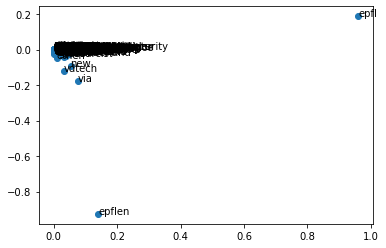

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *

plt.scatter(term_vecs_freq[:, 0], term_vecs_freq[:, 1])
for i, t in enumerate(vocab_freq):
    plt.annotate(t, (term_vecs_freq[i, 0], term_vecs_freq[i, 1]))
plt.show()

### 3.2. Explain the scatter plot of the term vectors

Hint: Do you see any outliers? What is a possible explanation?

*YOUR ANSWER HERE*